In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/arjbargav/DS_assignments/refs/heads/main/Neural%20Networks/Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [4]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
# Check missing values
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

1332

In [7]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [8]:
# Drop all duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# Descriptive statistics
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [11]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
df_norm = mn.fit_transform(df.drop(columns='letter'))
df_norm = pd.DataFrame(df_norm, columns=df.drop(columns='letter').columns)
df_norm

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,0.333333,0.533333,0.466667,0.466667,0.466667,0.466667,0.600000,0.266667,0.533333,0.466667,0.466667,0.533333,0.200000,0.666667,0.533333,0.400000
18664,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667
18665,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667
18666,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667


In [12]:
# Add the letter column to the Normalized dataset
df_norm['letter'] = df['letter'].values
df_norm

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,T
1,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,I
2,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,D
3,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,N
4,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,0.333333,0.533333,0.466667,0.466667,0.466667,0.466667,0.600000,0.266667,0.533333,0.466667,0.466667,0.533333,0.200000,0.666667,0.533333,0.400000,T
18664,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667,D
18665,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667,C
18666,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667,T


In [13]:
df_norm['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

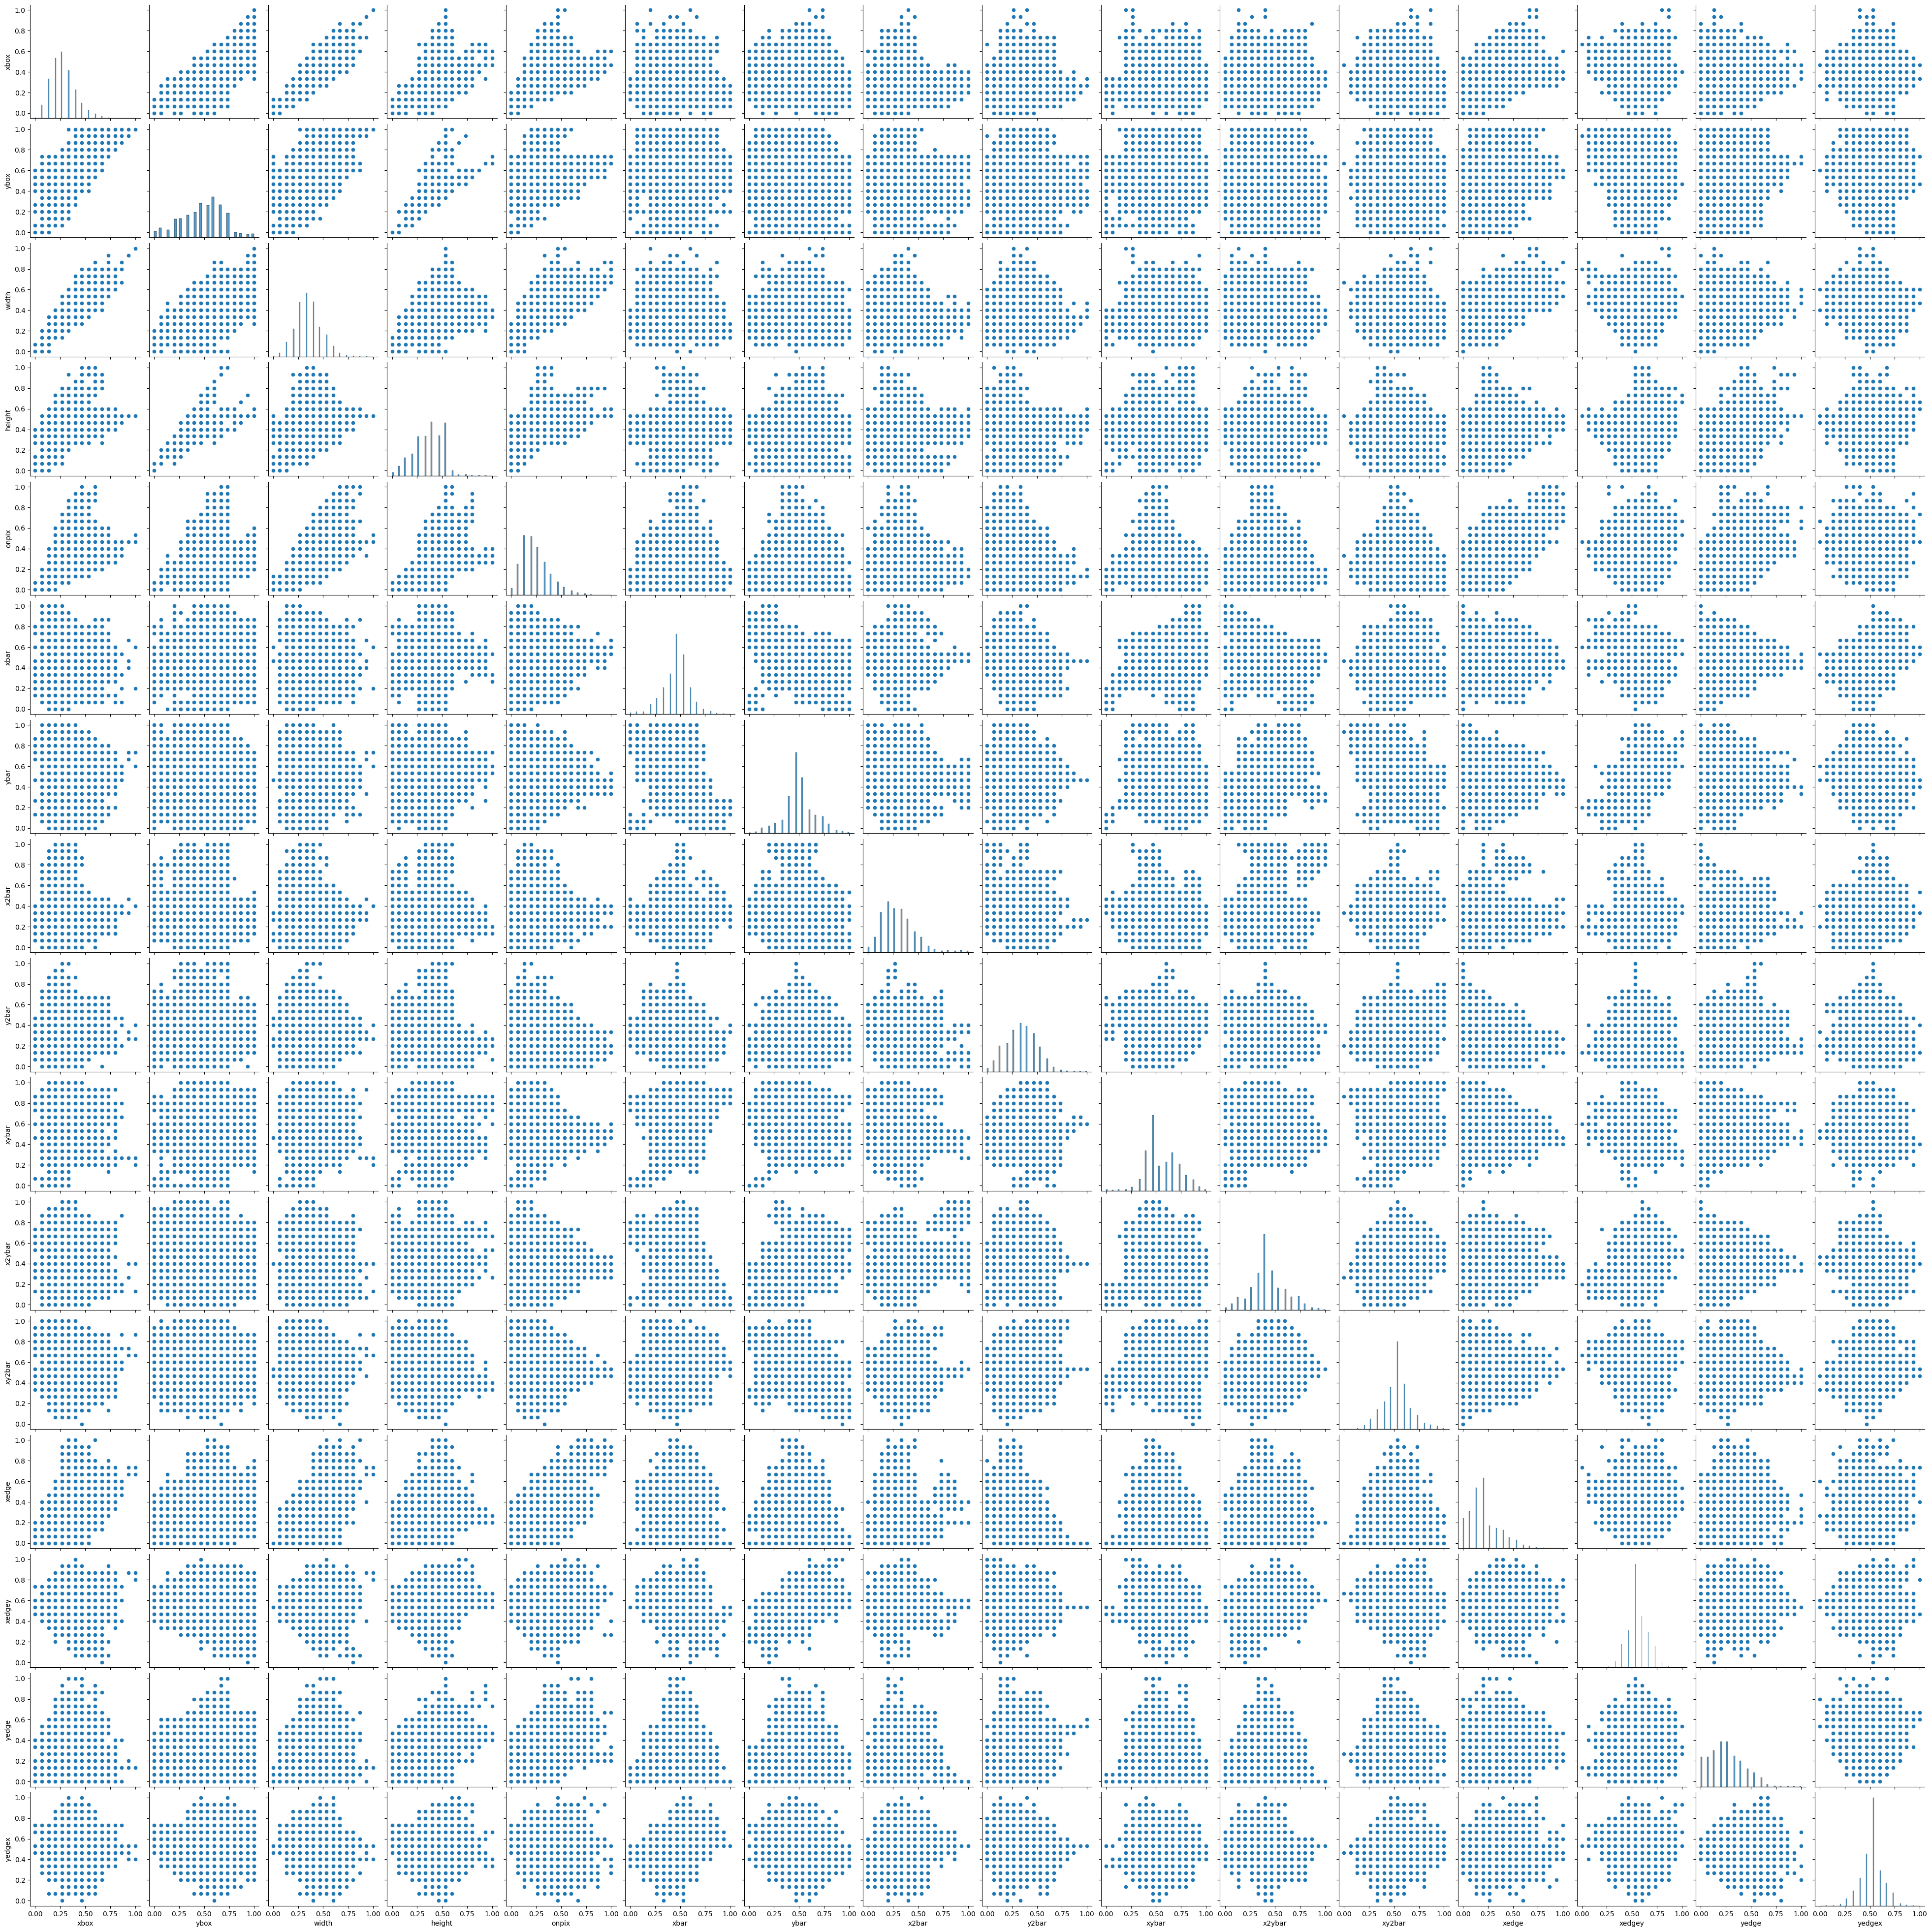

In [14]:
# Pairplot
sns.pairplot(df_norm)

<Axes: >

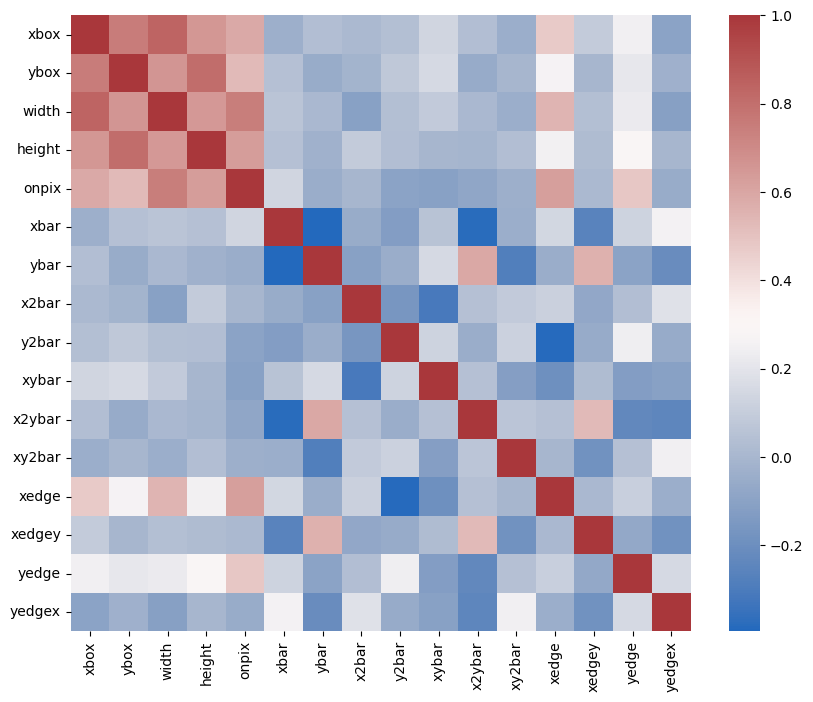

In [15]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_norm.drop(columns='letter').corr(),cmap='vlag')

# Model building

In [16]:
# Replace the alphabets with numerical values using Labelencoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_norm['letter'] = le.fit_transform(df_norm['letter'])
df_norm.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,19
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,8
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,3
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,13
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,6


In [17]:
# Train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_norm.drop(columns='letter'), df_norm['letter'], test_size=0.2, random_state=1)


In [18]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report


In [19]:
# Initialize the model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=10, activation='relu', input_dim=xtrain.shape[1]))

# Add output layer
ann.add(Dense(units=26, activation='softmax'))

# Establish connection between the layers
ann.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the data
ann.fit(xtrain.astype(np.float32), ytrain.astype(np.int32), epochs=100)

Epoch 1/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.0281 - loss: 3.3018
Epoch 2/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.0276 - loss: 3.3002
Epoch 3/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.0266 - loss: 3.3012
Epoch 4/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.0289 - loss: 3.3008
Epoch 5/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.0277 - loss: 3.2993
Epoch 6/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.0303 - loss: 3.3015
Epoch 7/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.0274 - loss: 3.2963
Epoch 8/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.0273 - loss: 3.2961
Epoch 9/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.0263 - loss: 3.2964
Epoch 10/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.0303 - loss: 3.2966
Epoch 11/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.0284 - loss: 3.2921
Epoch 12/100
467/46

We get an accuracy of only 6.17%. Therefore we chane the optimizer.

In [20]:
# Using Stochastic Gradient Descen
# Initialize the model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=10, activation='relu', input_dim=xtrain.shape[1]))

# Add output layer
ann.add(Dense(units=26, activation='softmax'))

# Establish connection between the layers
ann.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the data
ann.fit(np.array(xtrain).astype('float32'), np.array(ytrain).astype('float32'), epochs=250)

Epoch 1/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.0557 - loss: 3.2637
Epoch 2/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.0606 - loss: 3.2193
Epoch 3/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.0783 - loss: 3.1999
Epoch 4/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.0921 - loss: 3.1748
Epoch 5/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.0987 - loss: 3.1482
Epoch 6/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.1156 - loss: 3.1133
Epoch 7/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.1302 - loss: 3.0824
Epoch 8/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.1461 - loss: 3.0384
Epoch 9/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.1694 - loss: 2.9928
Epoch 10/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.1937 - loss: 2.9390
Epoch 11/250
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.2132 - loss: 2.8776
Epoch 12/250
467/46

In [21]:
# Using ADAM
# Initialize the model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=10, activation='relu', input_dim=xtrain.shape[1]))

# Add output layer
ann.add(Dense(units=26, activation='softmax'))

# Establish connection between the layers
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the data
ann.fit(np.array(xtrain).astype('float32'), np.array(ytrain).astype('float32'), epochs=100)

Epoch 1/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.0548 - loss: 3.2218
Epoch 2/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.1811 - loss: 2.9964
Epoch 3/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.3292 - loss: 2.6624
Epoch 4/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.3596 - loss: 2.4046
Epoch 5/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.3899 - loss: 2.2234
Epoch 6/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.4132 - loss: 2.1002
Epoch 7/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.4455 - loss: 1.9995
Epoch 8/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.4623 - loss: 1.9321
Epoch 9/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.4809 - loss: 1.8497
Epoch 10/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.5064 - loss: 1.7856
Epoch 11/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.5334 - loss: 1.7159
Epoch 12/100
467/46

In [22]:
# Using RMSPROP
# Initialize the model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=10, activation='relu', input_dim=xtrain.shape[1]))

# Add output layer
ann.add(Dense(units=26, activation='softmax'))

# Establish connection between the layers
ann.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the data
ann.fit(np.array(xtrain).astype('float32'), np.array(ytrain).astype('float32'), epochs=100)

Epoch 1/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.0618 - loss: 3.2210
Epoch 2/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.1441 - loss: 3.0566
Epoch 3/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.2582 - loss: 2.8229
Epoch 4/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.3159 - loss: 2.5938
Epoch 5/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.3590 - loss: 2.3949
Epoch 6/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.4017 - loss: 2.2405
Epoch 7/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.4453 - loss: 2.1096
Epoch 8/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.4595 - loss: 2.0063
Epoch 9/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.4803 - loss: 1.9214
Epoch 10/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4868 - loss: 1.8473
Epoch 11/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.5001 - loss: 1.7962
Epoch 12/100
467/46

In [23]:
# Using Adagrad
# Initialize the model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=10, activation='relu', input_dim=xtrain.shape[1]))

# Add output layer
ann.add(Dense(units=26, activation='softmax'))

# Establish connection between the layers
ann.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the data
ann.fit(np.array(xtrain).astype('float32'), np.array(ytrain).astype('float32'), epochs=100)

Epoch 1/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.0361 - loss: 3.2724
Epoch 2/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.0384 - loss: 3.2649
Epoch 3/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.0421 - loss: 3.2593
Epoch 4/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.0434 - loss: 3.2573
Epoch 5/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.0428 - loss: 3.2545
Epoch 6/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.0481 - loss: 3.2512
Epoch 7/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0520 - loss: 3.2484
Epoch 8/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0587 - loss: 3.2462
Epoch 9/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0634 - loss: 3.2453
Epoch 10/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.0691 - loss: 3.2425
Epoch 11/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.0694 - loss: 3.2400
Epoch 12/100
467/467 ━━━━

We see that the RMSPROP optimizer is providing a better accuracy of 72.5%

## Hyperparameter Tuning

In [24]:
!pip install -U keras-tuner


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import keras_tuner as kt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [52]:
# Define a function that will run the ANN model through different optimizers
def optimizer_selection(hp):
    # Initialize
    model = Sequential()
    # Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    # Add output layer
    model.add(Dense(units=26, activation='softmax'))
    # Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd', 'adam', 'rmsprop'])
    if optim == 'sgd':
        optimizer = SGD()
    elif optim == 'adam':
        optimizer = Adam()
    else:
        optimizer = RMSprop()
    model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [60]:
import shutil
shutil.rmtree('my_dir/tuning')

In [61]:
# Initialize the tuner
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=150,
    directory='my_dir',
    project_name='tuning'
)

In [62]:
tuner.search(xtrain, ytrain, epochs=150, validation_data=(xtest,ytest))

Trial 3 Complete [00h 01m 14s]
val_accuracy: 0.6446170210838318

Best val_accuracy So Far: 0.7230851650238037
Total elapsed time: 00h 03m 43s


In [63]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [64]:
# Create the ANN model using the results from tuning
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain, ytrain, epochs=100, validation_data=(xtest,ytest))

Epoch 1/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7193 - loss: 1.0466 - val_accuracy: 0.7105 - val_loss: 1.0458
Epoch 2/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7218 - loss: 1.0350 - val_accuracy: 0.7191 - val_loss: 1.0434
Epoch 3/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.7182 - loss: 1.0373 - val_accuracy: 0.7207 - val_loss: 1.0423
Epoch 4/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7241 - loss: 1.0202 - val_accuracy: 0.7169 - val_loss: 1.0438
Epoch 5/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7181 - loss: 1.0449 - val_accuracy: 0.7215 - val_loss: 1.0429
Epoch 6/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.7186 - loss: 1.0355 - val_accuracy: 0.7207 - val_loss: 1.0428
Epoch 7/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7250 - loss: 1.0221 - val_accuracy: 0.7177 - val_loss: 1.0387
Epoch 8/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7317 - loss: 1.0

In [65]:
ypred = model.predict(xtest)
ypred

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


array([[6.6441629e-07, 3.9306391e-07, 2.2658194e-06, ..., 3.9796585e-05,
        2.1840601e-04, 5.8975953e-09],
       [2.3970345e-02, 8.2383296e-03, 7.9743573e-03, ..., 5.5576045e-02,
        7.9708398e-06, 3.4287147e-04],
       [4.2870378e-09, 1.7755997e-06, 3.5096342e-08, ..., 4.0522949e-09,
        7.9464105e-13, 4.4808318e-16],
       ...,
       [1.2884449e-05, 4.2814822e-03, 1.2119030e-05, ..., 6.9899648e-02,
        4.4702971e-03, 1.9120693e-01],
       [7.7856344e-04, 1.6320972e-01, 3.6911835e-04, ..., 7.0498153e-03,
        1.2157149e-08, 5.2504216e-05],
       [2.2602153e-03, 4.4938986e-04, 4.3483707e-04, ..., 2.0171530e-05,
        6.4380743e-07, 2.2200791e-05]], dtype=float32)

In [73]:
# Get predicted class labels from probabilities
ypred_labels = np.argmax(ypred, axis=1)

# Print the classification report
print(classification_report(np.array(ytest), ypred_labels))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       153
           1       0.62      0.75      0.68       138
           2       0.73      0.68      0.70       133
           3       0.70      0.83      0.76       155
           4       0.59      0.73      0.65       131
           5       0.72      0.63      0.67       153
           6       0.57      0.61      0.59       131
           7       0.54      0.40      0.46       131
           8       0.76      0.57      0.65       106
           9       0.86      0.82      0.84       159
          10       0.61      0.67      0.64       129
          11       0.78      0.74      0.76       132
          12       0.88      0.93      0.90       151
          13       0.92      0.79      0.85       156
          14       0.66      0.69      0.67       154
          15       0.83      0.79      0.81       175
          16       0.68      0.65      0.66       165
          17       0.62    

WIth the tuned ANN model we are able to obtain a much higher accuracy metrics as shown above